Successfully loaded data from Reddit and X.

Found 20 shared keywords: ['prices', 'solar', 'gas', 'centers', '2025', 'electric', 'data', 'trump', 'uk', 'grid', 'energy', '100', 'utility', 'electricity', 'power', 'industry', 'crisis', 'new', 'coal', 'help']

Generating final signal chart...


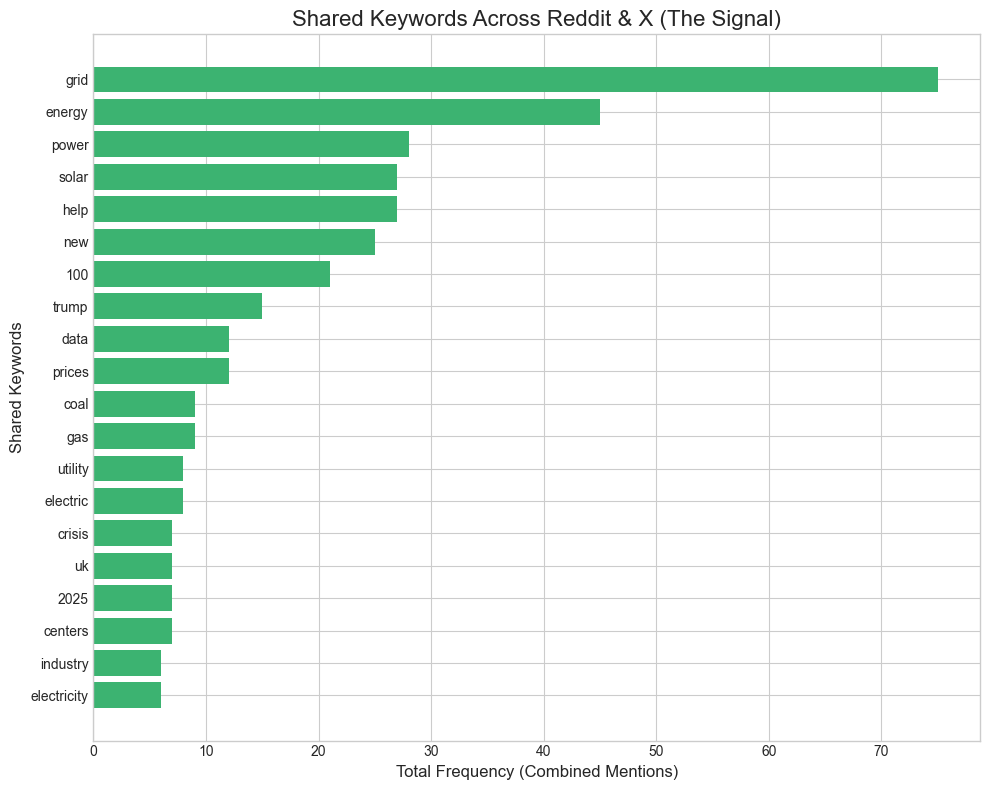


Final chart saved to /figures/final_signal_chart.png


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import os
import numpy as np

# --- 1. LOAD ALL DATA SOURCES ---
reddit_path = '../data/raw/reddit_titles.csv'
twitter_path = '../data/raw/twitter_data.csv'

df_reddit = pd.read_csv(reddit_path)
df_twitter = pd.read_csv(twitter_path)

print("Successfully loaded data from Reddit and X.")

# Combine all titles into one list for analysis
all_titles = pd.concat([df_reddit['title'].dropna(), df_twitter['title'].dropna()], ignore_index=True)

# --- 2. IDENTIFY SHARED KEYWORDS ---
# Use one vectorizer to find keywords in each source
vectorizer_shared = CountVectorizer(stop_words='english', max_features=50)
vectorizer_shared.fit(all_titles)

# Create a set of keywords for each platform
reddit_keywords = {word for word in vectorizer_shared.get_feature_names_out() if vectorizer_shared.transform(df_reddit['title'].dropna()).toarray().sum(axis=0)[vectorizer_shared.vocabulary_[word]] > 0}
twitter_keywords = {word for word in vectorizer_shared.get_feature_names_out() if vectorizer_shared.transform(df_twitter['title'].dropna()).toarray().sum(axis=0)[vectorizer_shared.vocabulary_[word]] > 0}

# Find the intersection (the keywords they share)
shared_keywords = list(reddit_keywords.intersection(twitter_keywords))

print(f"\nFound {len(shared_keywords)} shared keywords: {shared_keywords}")

# --- 3. CALCULATE FREQUENCY & VISUALIZE THE SIGNAL ---
if shared_keywords:
    # Create a new vectorizer focused ONLY on the shared keywords to get their total frequency
    vectorizer_final = CountVectorizer(vocabulary=shared_keywords)
    total_counts = vectorizer_final.fit_transform(all_titles)
    summed_counts = np.array(total_counts.sum(axis=0)).flatten()

    # Create the final DataFrame for plotting
    final_df = pd.DataFrame({
        'keyword': shared_keywords,
        'frequency': summed_counts
    }).sort_values(by='frequency', ascending=True)

    # --- Generate the Plot ---
    print("\nGenerating final signal chart...")
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.barh(final_df['keyword'], final_df['frequency'], color='mediumseagreen')
    ax.set_title('Shared Keywords Across Reddit & X (The Signal)', fontsize=16)
    ax.set_xlabel('Total Frequency (Combined Mentions)', fontsize=12)
    ax.set_ylabel('Shared Keywords', fontsize=12)
    plt.tight_layout()
    
    # Save the final chart
    os.makedirs('../figures', exist_ok=True)
    plt.savefig('../figures/final_signal_chart.png')
    
    plt.show()
    print("\nFinal chart saved to /figures/final_signal_chart.png")
else:
    print("\nNo shared keywords were found to visualize.")